In [47]:
import pandas as pd
import numpy as np
from  imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
df = pd.read_csv("incomeData.csv")

In [49]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [50]:
# Making sure that the data doesn't have unecessary spaces
df = df.apply(lambda x:x.str.strip() if x.dtype == "object" else x)


In [51]:
#In this data, the missing values are denoted by '?'
#We replace '?' with NaN for them to be imputed down the line.
df.replace('?',np.NaN,inplace = True)

In [52]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Income               0
dtype: int64

In [53]:
#checking for the missing value
cols=df.columns
mc=[]
a=df.isna().sum()
for i in range(15):
    if a[i]>0:
        mc.append(cols[i])

In [54]:
len(a)

15

In [55]:
#columns with missing values
mc

['workclass', 'occupation', 'native-country']

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [57]:
#As the columns have missing values, and are categorical only, we have to use categorical imputer
for i in df.columns:
    try:
        mode=df[i].mode()[0]
        df[i]=df[i].fillna(mode)
    except:
        pass

In [58]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [59]:
#The education column has a corresponding education-num column which has numerical values
df.drop(columns=['education'],inplace = True)

In [60]:
#Extracting the categorical columns
cat_df = df.select_dtypes(include=['object']).copy()

In [61]:
cat_df.columns

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'Income'],
      dtype='object')

In [62]:
cat_df['Income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [63]:
cat_df['Income']=cat_df['Income'].map({'<=50K':0,'>50K':1})

In [64]:
#Using the dummy encoding to encode the categorical column to numerical ones
for col in cat_df.drop('Income',axis=1).columns:
    x=cat_df[col].head(1)
    cat_df=pd.get_dummies(cat_df,columns=[col],prefix=[col],drop_first= True)

In [65]:
cat_df.head()

,Income,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [66]:
#Extracting numerical columns
num_df = df.select_dtypes(include=['int64']).copy()

In [67]:
num_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scaler = StandardScaler()
scaled_data=scaler.fit_transform(num_df)

In [70]:
scaled_num_df=pd.DataFrame(data=scaled_data,columns=num_df.columns)

In [71]:
scaled_num_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [72]:
#Combining the numerical and categorical dataframes to get the final dataset
final_df=pd.concat([scaled_num_df,cat_df],axis=1)

In [73]:
final_df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Income,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [74]:
#separating the feature and target columns
x=final_df.drop('Income',axis=1)
y=final_df['Income']

In [89]:
x

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.639741,0.746039,-0.145920,-0.21666,-0.197409,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32557,0.103983,-0.335433,-0.420060,-0.145920,-0.21666,-0.035429,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32558,1.423610,-0.358777,-0.420060,-0.145920,-0.21666,-0.035429,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
32559,-1.215643,0.110960,-0.420060,-0.145920,-0.21666,-1.655225,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


If we plot the distribution of the target column we would find that the people with less than 50K annual income are more in number than the people greater than 50K

In [90]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: Income, Length: 32561, dtype: int64

(array([24720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7841.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

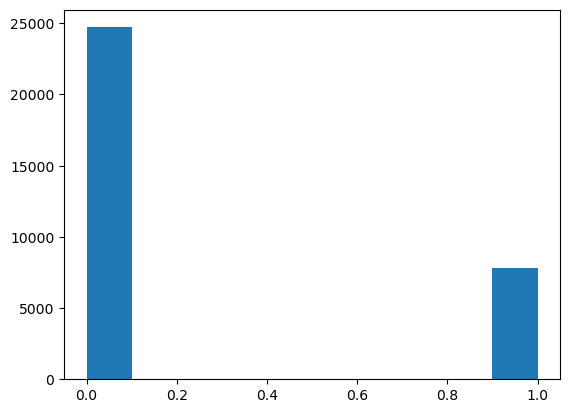

In [75]:
plt.hist(y)

Hence the dataset is imbalanced,we need to make it balanced by using random sampling

In [93]:
from imblearn.over_sampling import RandomOverSampler
rdsmple = RandomOverSampler()
x_resampled, y_resampled = rdsmple.fit_resample(x, y)


(array([24720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 24720.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

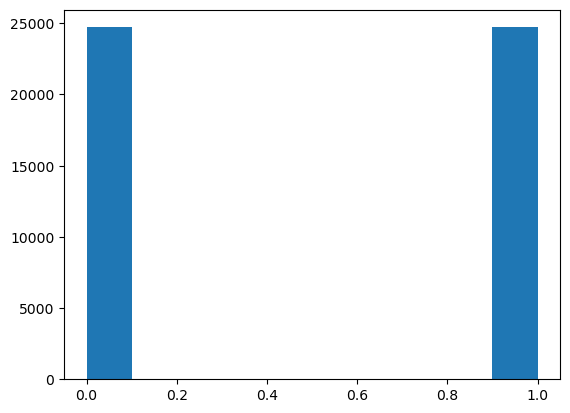

In [95]:
plt.hist(y_resampled)